In [1]:
# Data Analysis and Wrangling
import pandas as pd
import numpy as np
import random as rnd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#For encoding 
from sklearn.preprocessing import OneHotEncoder

# Machine Learning Model
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Training Dataset
train_data = pd.read_csv('loan_data_set.csv')
train_data.head()
train_data.to_parquet('original_dataset.parquet')

In [3]:
train_data.shape

(887379, 30)

In [4]:
train_data.columns

Index(['id', 'year', 'issue_d', 'final_d', 'emp_length_int', 'home_ownership',
       'home_ownership_cat', 'income_category', 'annual_inc', 'income_cat',
       'loan_amount', 'term', 'term_cat', 'application_type',
       'application_type_cat', 'purpose', 'purpose_cat', 'interest_payments',
       'interest_payment_cat', 'loan_condition', 'loan_condition_cat',
       'interest_rate', 'grade', 'grade_cat', 'dti', 'total_pymnt',
       'total_rec_prncp', 'recoveries', 'installment', 'region'],
      dtype='object')

<AxesSubplot:>

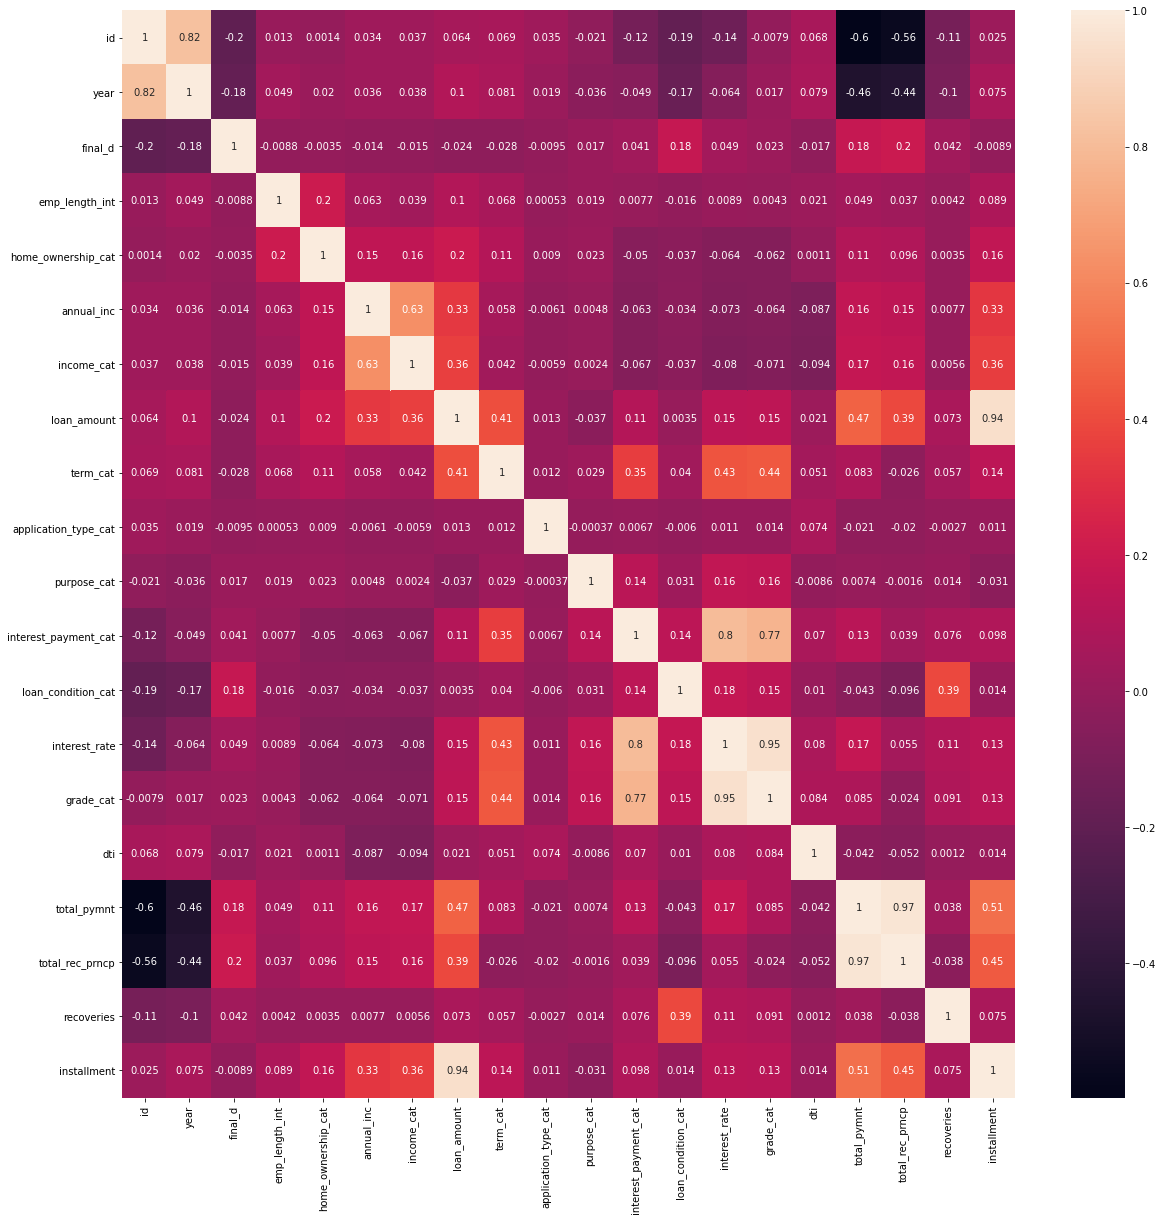

In [5]:
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(), annot=True)

In [6]:
# Drop Columns which are not related 
train_data = train_data.drop(['id','year','issue_d','final_d','home_ownership_cat','income_cat','application_type_cat','term_cat',
                             'purpose_cat','interest_payment_cat','loan_condition','grade_cat',
                             'total_pymnt','total_rec_prncp','recoveries','region','interest_payments',
                              'interest_payment_cat'],axis=1)



In [7]:
# Fixing attributes 
train_data.loc[train_data['term'] == ' 36 months', 'term'] = 36
train_data.loc[train_data['term'] == ' 60 months', 'term'] = 60
train_data.loc[train_data['home_ownership'] == 'MORTGAGE', 'home_ownership'] = 'Mortgage'
train_data.loc[train_data['home_ownership'] == 'ANY', 'home_ownership'] = 'Any'
train_data.loc[train_data['home_ownership'] == 'RENT', 'home_ownership'] = 'Rent'
train_data.loc[train_data['home_ownership'] == 'OWN', 'home_ownership'] = 'Own'
train_data.loc[train_data['home_ownership'] == 'NONE', 'home_ownership'] = 'None'
train_data.loc[train_data['home_ownership'] == 'OTHER', 'home_ownership'] = 'Other'
train_data.loc[train_data['application_type'] == 'INDIVIDUAL', 'application_type'] = 'Individual'
train_data.loc[train_data['application_type'] == 'JOINT', 'application_type'] = 'Joint'
train_data.loc[train_data['purpose'] == 'credit_card', 'purpose'] = 'Credit Card'
train_data.loc[train_data['purpose'] == 'debt_consolidation', 'purpose'] = 'Debt Consolidation'
train_data.loc[train_data['purpose'] == 'renewable_energy', 'purpose'] = 'Renewable Energy'
train_data.loc[train_data['purpose'] == 'major_purchase', 'purpose'] = 'Major Purchase'
train_data.loc[train_data['purpose'] == 'small_business', 'purpose'] = 'Small Business'
train_data.loc[train_data['purpose'] == 'home_improvement', 'purpose'] = 'Home Improvement'
train_data.loc[train_data['purpose'] == 'car', 'purpose'] = 'Car'
train_data.loc[train_data['purpose'] == 'educational', 'purpose'] = 'Educational'
train_data.loc[train_data['purpose'] == 'house', 'purpose'] = 'House'
train_data.loc[train_data['purpose'] == 'medical', 'purpose'] = 'Medical'
train_data.loc[train_data['purpose'] == 'moving', 'purpose'] = 'Moving'
train_data.loc[train_data['purpose'] == 'other', 'purpose'] = 'Other'
train_data.loc[train_data['purpose'] == 'vacation', 'purpose'] = 'Vacation'
train_data.loc[train_data['purpose'] == 'wedding', 'purpose'] = 'Wedding'
train_data

,emp_length_int,home_ownership,income_category,annual_inc,loan_amount,term,application_type,purpose,loan_condition_cat,interest_rate,grade,dti,installment
0,10.0,Rent,Low,24000,5000,36,Individual,Credit Card,0,10.65,B,27.65,162.87
1,0.5,Rent,Low,30000,2500,60,Individual,Car,1,15.27,C,1.00,59.83
2,10.0,Rent,Low,12252,2400,36,Individual,Small Business,0,15.96,C,8.72,84.33
3,10.0,Rent,Low,49200,10000,36,Individual,Other,0,13.49,C,20.00,339.31
4,1.0,Rent,Low,80000,3000,60,Individual,Other,0,12.69,B,17.94,67.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,8.0,Rent,Low,31000,10000,36,Individual,Debt Consolidation,0,11.99,B,28.69,332.10
887375,10.0,Mortgage,Low,79000,24000,36,Individual,Home Improvement,0,11.99,B,3.90,797.03
887376,5.0,Rent,Low,35000,13000,60,Individual,Debt Consolidation,0,15.99,D,30.90,316.07
887377,1.0,Rent,Low,64400,12000,60,Individual,Debt Consolidation,0,19.99,E,27.19,317.86


In [8]:
train_data.rename(columns={'emp_length_int': 'employment_years'},inplace = True)
train_data.rename(columns={'loan_condition_cat': 'loan_condition'},inplace = True)

In [9]:
train_data.columns

Index(['employment_years', 'home_ownership', 'income_category', 'annual_inc',
       'loan_amount', 'term', 'application_type', 'purpose', 'loan_condition',
       'interest_rate', 'grade', 'dti', 'installment'],
      dtype='object')

In [10]:
# Check Null & Duplicate Values in Training Dataset
print('\nNull Values in Training \n{}'.format(train_data.isnull().sum()))
print()
print('\nDuplicated values in train {}'.format(train_data.duplicated().sum()))


Null Values in Training 
employment_years    0
home_ownership      0
income_category     0
annual_inc          0
loan_amount         0
term                0
application_type    0
purpose             0
loan_condition      0
interest_rate       0
grade               0
dti                 0
installment         0
dtype: int64


Duplicated values in train 28


<AxesSubplot:>

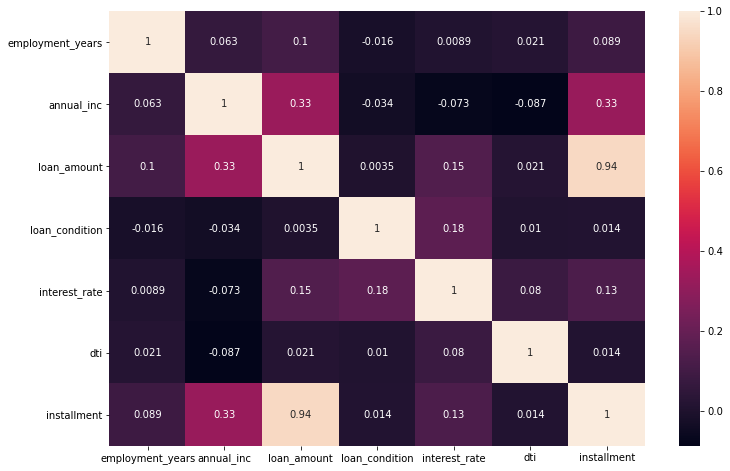

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(), annot=True)
#plt.tight_layout()

In [12]:
#Dividing the target and features
inputs_cols1 = list(train_data.columns)[0:8]
inputs_cols2 = list(train_data.columns)[9:13]
target_col = []
target_col.append(train_data.columns[8])

input_cols = inputs_cols1 + inputs_cols2

print("Input Columns : {}".format(input_cols))
print("Target Column : {} ".format(target_col))



Input Columns : ['employment_years', 'home_ownership', 'income_category', 'annual_inc', 'loan_amount', 'term', 'application_type', 'purpose', 'interest_rate', 'grade', 'dti', 'installment']
Target Column : ['loan_condition'] 


In [13]:
train_inputs = train_data[input_cols].copy()
train_targets = train_data[target_col].copy()
train_inputs

,employment_years,home_ownership,income_category,annual_inc,loan_amount,term,application_type,purpose,interest_rate,grade,dti,installment
0,10.0,Rent,Low,24000,5000,36,Individual,Credit Card,10.65,B,27.65,162.87
1,0.5,Rent,Low,30000,2500,60,Individual,Car,15.27,C,1.00,59.83
2,10.0,Rent,Low,12252,2400,36,Individual,Small Business,15.96,C,8.72,84.33
3,10.0,Rent,Low,49200,10000,36,Individual,Other,13.49,C,20.00,339.31
4,1.0,Rent,Low,80000,3000,60,Individual,Other,12.69,B,17.94,67.79
...,...,...,...,...,...,...,...,...,...,...,...,...
887374,8.0,Rent,Low,31000,10000,36,Individual,Debt Consolidation,11.99,B,28.69,332.10
887375,10.0,Mortgage,Low,79000,24000,36,Individual,Home Improvement,11.99,B,3.90,797.03
887376,5.0,Rent,Low,35000,13000,60,Individual,Debt Consolidation,15.99,D,30.90,316.07
887377,1.0,Rent,Low,64400,12000,60,Individual,Debt Consolidation,19.99,E,27.19,317.86


In [14]:
#One Hot Encoding Data
from sklearn.preprocessing import OneHotEncoder

numerical_cols_train = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols_train = train_inputs.select_dtypes('object').columns.tolist()

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_inputs[categorical_cols_train])
encoded_cols = list(encoder.get_feature_names(categorical_cols_train))

train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols_train])
train_inputs = train_inputs[numerical_cols_train + encoded_cols]
train_inputs

,employment_years,annual_inc,loan_amount,interest_rate,dti,installment,home_ownership_Any,home_ownership_Mortgage,home_ownership_None,home_ownership_Other,...,purpose_Small Business,purpose_Vacation,purpose_Wedding,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,10.0,24000,5000,10.65,27.65,162.87,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.5,30000,2500,15.27,1.00,59.83,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,10.0,12252,2400,15.96,8.72,84.33,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,10.0,49200,10000,13.49,20.00,339.31,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,80000,3000,12.69,17.94,67.79,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,8.0,31000,10000,11.99,28.69,332.10,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
887375,10.0,79000,24000,11.99,3.90,797.03,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
887376,5.0,35000,13000,15.99,30.90,316.07,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
887377,1.0,64400,12000,19.99,27.19,317.86,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
# Normalize Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(train_inputs[numerical_cols_train])
train_inputs[numerical_cols_train] = scaler.transform(train_inputs[numerical_cols_train])


train_inputs.columns

<ipython-input-15-b2f7379b84d8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[numerical_cols_train] = scaler.transform(train_inputs[numerical_cols_train])
C:\Users\Asiyaa\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Index(['employment_years', 'annual_inc', 'loan_amount', 'interest_rate', 'dti',
       'installment', 'home_ownership_Any', 'home_ownership_Mortgage',
       'home_ownership_None', 'home_ownership_Other', 'home_ownership_Own',
       'home_ownership_Rent', 'income_category_High', 'income_category_Low',
       'income_category_Medium', 'term_36', 'term_60',
       'application_type_Individual', 'application_type_Joint', 'purpose_Car',
       'purpose_Credit Card', 'purpose_Debt Consolidation',
       'purpose_Educational', 'purpose_Home Improvement', 'purpose_House',
       'purpose_Major Purchase', 'purpose_Medical', 'purpose_Moving',
       'purpose_Other', 'purpose_Renewable Energy', 'purpose_Small Business',
       'purpose_Vacation', 'purpose_Wedding', 'grade_A', 'grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G'],
      dtype='object')

In [16]:
# Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [17]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(train_inputs, train_targets, test_size=0.3,random_state=50)





In [18]:
print(train_inputs)

        employment_years  annual_inc  loan_amount  interest_rate       dti  \
559056          0.584211    0.012526     1.000000       0.262357  0.002414   
388221          0.578947    0.004737     0.057971       0.365864  0.002475   
670842          1.000000    0.005684     0.194928       0.239544  0.001929   
611155          0.000000    0.005789     0.298551       0.585974  0.001486   
559161          1.000000    0.009789     0.681159       0.197296  0.002059   
...                  ...         ...          ...            ...       ...   
321502          1.000000    0.002600     0.306522       0.302915  0.002135   
441633          0.000000    0.007895     0.333333       0.281791  0.002462   
677997          0.052632    0.004421     0.330435       0.294466  0.001823   
239499          0.578947    0.006316     0.217391       0.281791  0.001514   
103904          1.000000    0.006779     0.797101       0.633291  0.002337   

        installment  home_ownership_Any  home_ownership_Mortgag

In [19]:
print(train_targets)

        loan_condition
559056               0
388221               0
670842               0
611155               0
559161               0
...                ...
321502               0
441633               0
677997               0
239499               0
103904               0

[621165 rows x 1 columns]


In [20]:
print(val_inputs)

        employment_years  annual_inc  loan_amount  interest_rate       dti  \
264634          1.000000    0.008947     0.565217       0.387410  0.001769   
683855          1.000000    0.008947     0.130435       0.294466  0.003975   
386797          0.894737    0.009474     0.455072       0.339248  0.003164   
242736          0.000000    0.011579     0.114493       0.298690  0.001059   
871758          0.584211    0.002737     0.284783       0.499366  0.001773   
...                  ...         ...          ...            ...       ...   
196257          0.000000    0.004211     0.353623       0.245881  0.001053   
442795          0.157895    0.009789     0.333333       0.517533  0.001693   
282264          0.368421    0.002000     0.176812       0.339248  0.000840   
740912          0.000000    0.005263     0.159420       0.262357  0.001894   
758622          0.684211    0.005263     0.333333       0.294466  0.002242   

        installment  home_ownership_Any  home_ownership_Mortgag

In [21]:
print(val_targets)

        loan_condition
264634               0
683855               0
386797               0
242736               0
871758               0
...                ...
196257               0
442795               0
282264               0
740912               0
758622               0

[266214 rows x 1 columns]


In [22]:
clf = RandomForestClassifier(random_state=50,n_jobs = -1,n_estimators=10000,max_depth=10,min_samples_split=10,min_samples_leaf=2)

clf.fit(train_inputs, train_targets)

<ipython-input-22-9044d645002e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_inputs, train_targets)


RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=10000, n_jobs=-1, random_state=50)

In [24]:
from sklearn.model_selection import cross_val_score
train_score = clf.score(train_inputs,train_targets)
val_score = clf.score(val_inputs,val_targets)

print(train_score)
print(val_score)


0.9241538077644427
0.9236854560616646


In [ ]:
#Cross - Validating
cross_val_score = np.mean(cross_val_score(clf, train_inputs, train_targets, cv=5))

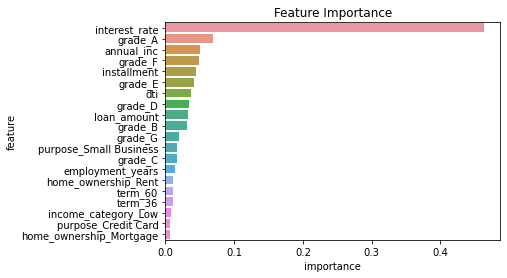

In [25]:
# Feature Importance

importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': clf.feature_importances_
}).sort_values('importance', ascending=False)

plt.title('Feature Importance')
sns.barplot(data=importance_df.head(20), x='importance', y='feature');



In [32]:
#Saving the model
import joblib

leo_ml_classification = {
    'model': clf,
    'scaler': scaler,
    'encoder': encoder,
    'numeric_cols': numerical_cols_train,
    'categorical_cols': categorical_cols_train,
    'encoded_cols': encoded_cols,
    'train_score':train_score,
    'val_score':val_score
}


joblib.dump(leo_ml_classification, 'leo_ml_classification.pkl',compress=9)


['leo_ml_classification.pkl']

In [27]:
#Saving data set as parquet file
train_inputs.to_parquet('train_inputs.parquet')
train_targets.to_parquet('train_targets.parquet')
val_inputs.to_parquet('val_inputs.parquet')
val_targets.to_parquet('val_targets.parquet')

In [63]:
# Choosing the best model among several models
model_params = {
    'decision_tree': {
        'model': DecisionTreeClassifier(random_state= 50),
        'params' : {
            'splitter': ['best'],
            'max_features': ['auto'],
            'max_depth':[100,200],
            'min_samples_leaf':[10,20],
            'max_leaf_nodes':[1000,2000]
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(random_state= 50),
        'params' : {
            'n_estimators': [10000],
            'n_jobs':[-1],
            'min_samples_split':[10],
            'min_samples_leaf':[5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [1,5,10],
            'solver':['liblinear'],
            'multi_class':['auto']
        }
    }
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

scores = []

for model_name, mp in model_params.items():
    model =  RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    model.fit(train_inputs, train_targets)
    scores.append({
        'model': model_name,
        'best_score': model.best_score_,
        'best_params': model.best_params_,
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\Asiyaa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Asiyaa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Asiyaa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asiyaa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using